## Reading 30-1 - Quantifying Computing Performance

Sometimes, when we are writing programs, our customer wants the program to run as fast as possible. In that way, we are like Maverick and Goose in Top Gun. 

[![](http://img.youtube.com/vi/4PzpztFJZP8/mqdefault.jpg)](https://www.youtube.com/watch?v=4PzpztFJZP8)
<center>I feel the need... the need... for speed!</center>

When we "feel the need... for speed", we must make the program run as fast as possible. In other environments, we must consider the limited memory resources

Often, these two goals are at odds. In order to improve run time, we require more memory to store intermediate steps so we can take advantage of dynamic programming. If we do not have the ability to store intermediate steps, we will need to run slower.


### Towards Computing Complexity

In order to understand how to quantify run time, we should understand some simple examples, and then build towards the advanced mathematical operation. First, let us consider this simple code segment where we read in the value from the command line. How many operations does this program take (not counting the <code>argc != 2</code> and <code>return</code> statements)?

> This code may be found at <a href = "">constant.cpp

### Our First Example: Generating subsets

We first consider the problem of generating all subsets of a set of n elements. For example, the subsets of {0,1,2} are:

    {0}, {1}, {2}, {0,1}, {0,2}, {1,2} and {0,1,2}

An elegant way to go through all subsets of a set is to use recursion. The following function search generates the subsets of the set {0,1,...,n − 1}. The function maintains a vector subset that will contain the elements of each subset.

The search begins when the function is called with parameter 0 as the start, and 3 as the end in main. The full code that generates this solution may be found at <a href = "https://github.com/mmorri22/cse20133/blob/main/readings/lec30/subset.cpp">subset.cpp</a>.
<ul>
    <li>We see that, in order to perform the trace, we need to push and pop onto the back, which means we should use a <b>deque data structure</b>.</li>
    <li>We also see that we are passing the current deque with a <b>C++ Call by Reference</b> to reduce code complexity while <b>preserving intermediate steps</b>.</li>
</ul>

    void search( std::deque<int>& subset, int start, int end ) {

        if ( start == end ) {
            std::cout << "{ ";

            if( subset.size() == 0 ){
                std::cout << "Empty Set ";
            }

            // Smart Iterator
            for( int value : subset ){
                std::cout << value << " ";
            }
            std::cout << "}, ";
        } 

        else {
            search(subset, start+1, end);
            subset.push_back(start);
            search(subset, start+1, end);
            subset.pop_back();
        }
    }

The following tree illustrates the function calls when end = 3. We can always choose either the left branch (k is not included in the subset) or the right branch. (k is included in the subset). 

> You can see that the complete search derived the exact solution that was printed in the subset.cpp code above. (I have include an explanatory video below the diagram for audio/visual learners)

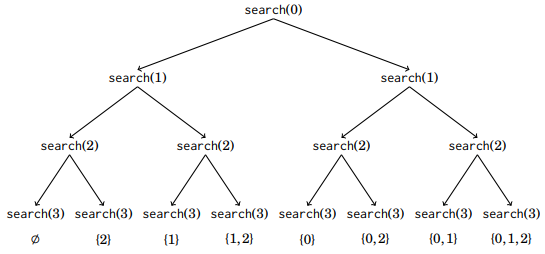



And here is the result of the computational run.

    > g++ -m64 -std=c++2a -Wall -Wextra -Wconversion -Werror subset.cpp -o subset 
    > ./subset 
    { Empty Set }, { 2 }, { 1 }, { 1 2 }, { 0 }, { 0 2 }, { 0 1 }, { 0 1 2 }, 

### <font color = "red">Class Introduction Question #1 - What is a Complete Search, and what are some examples of complete search that we have already investigated this semester?</a>

### The next reading for this lecture is <a href = "https://github.com/mmorri22/cse20133/blob/main/readings/lec30/Reading%2030-2.ipynb">Reading 30-2 - Backtracking and Pruning the Search Tree</a>